# Student Report Analysis

### Installing Libraries in CMD

In [234]:
#pip install numpy
#pip install seaborn
#pip install pandas
#pip install matplotlib

### Importing Libraries

In [235]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

### Reading the CSV files

In [236]:
df=pd.read_csv("StudentResultAnalysis.csv")

### To read first 5 rows

In [237]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### To generate descriptive statistics 

In [238]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


### To know datatypes of all columns

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### To count the number of null values

In [240]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Drop unnamed column

In [241]:
df=df.drop("Unnamed: 0",axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


## Gender Distribution

### To show the counts of observations in each categorical bin using countplot on Gender Distribution

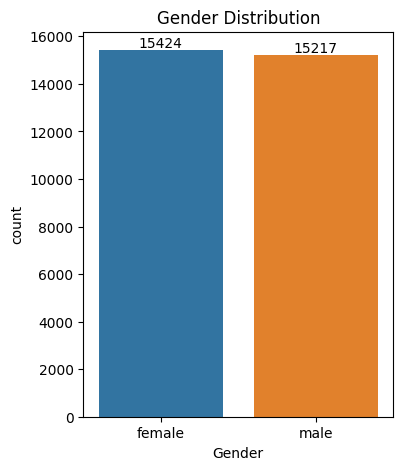

In [242]:
plt.figure(figsize=(4,5))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

##### Finding from the above chart:Number of females in the data is more than males.

### Impact of Parent Education on Student Courses

In [243]:
gb=df.groupby("ParentEduc").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


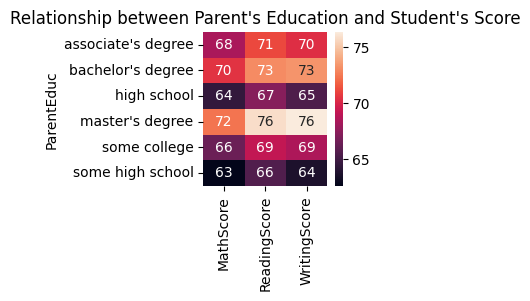

In [244]:
plt.figure(figsize=(2,2))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

##### Finding:We have found that Parents Education have good impact on their children score

### Impact of Parent Marital Status on Student Courses

In [245]:
pms=df.groupby("ParentMaritalStatus").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(pms)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


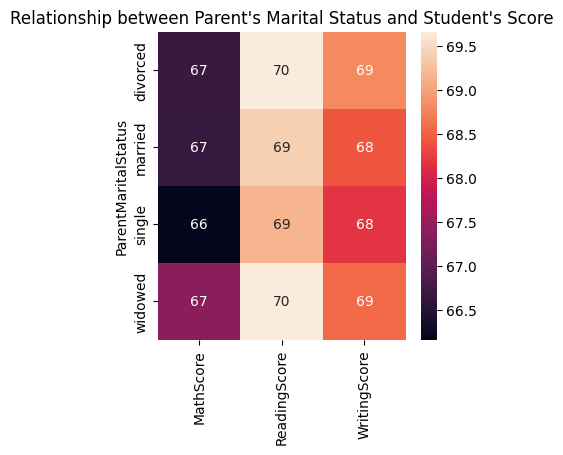

In [246]:
plt.figure(figsize=(4,4))
sns.heatmap(pms,annot=True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

##### Finding:We have concluded that there is no/negligible impact of student's score due to their martial status

### To find outliers in MathScore,  ReadingScore,  WritingScore using Boxplot

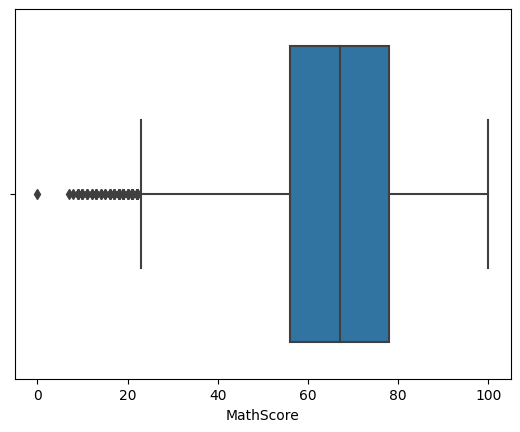

In [247]:
sns.boxplot(data=df,x="MathScore")
plt.show()

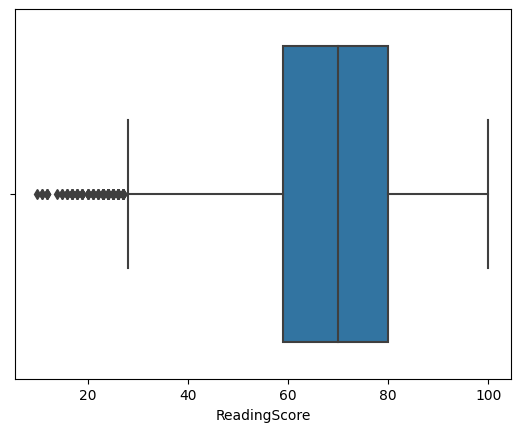

In [248]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

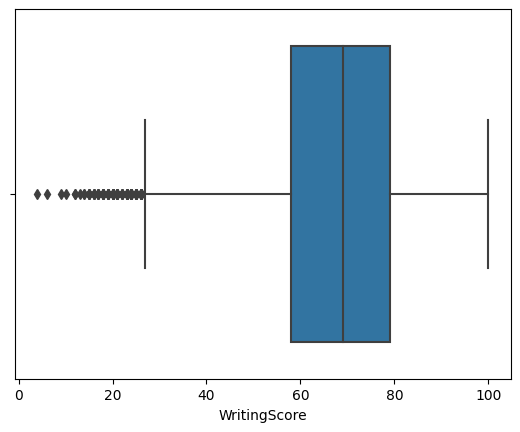

In [249]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

##### Finding:It shows that students are weak in Math as compared to Reading and Writing.

## Distribution of Ethic Groups

### Finding values of only those who are in group A of 'Ethnic Group' column

In [250]:
groupA=df.loc[(df['EthnicGroup']=='group A')].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


### To create pie chart on Distribution of Ethic Group

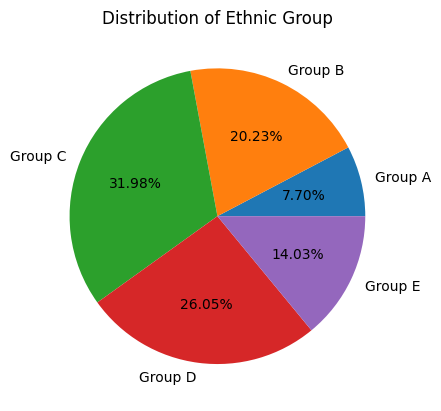

In [251]:
groupA=df.loc[(df['EthnicGroup']=='group A')].count()
groupB=df.loc[(df['EthnicGroup']=='group B')].count()
groupC=df.loc[(df['EthnicGroup']=='group C')].count()
groupD=df.loc[(df['EthnicGroup']=='group D')].count()
groupE=df.loc[(df['EthnicGroup']=='group E')].count()
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
l=["Group A","Group B","Group C","Group D","Group E"]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()

### Count of Ethic Group using Countplot

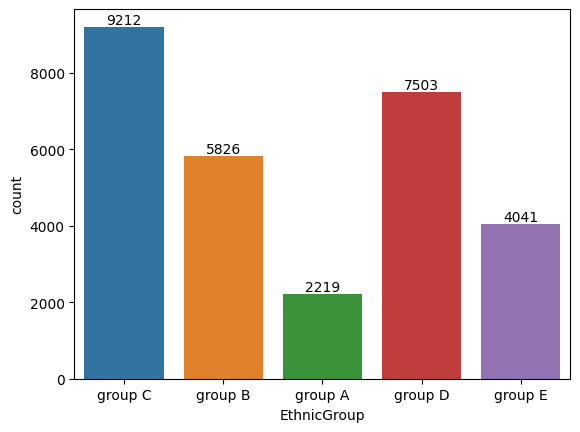

In [252]:
ax=sns.countplot(data=df,x="EthnicGroup")
ax.bar_label(ax.containers[0])
plt.show()

### Impact of Practice Sport on Student Courses

In [253]:
ps=df.groupby("PracticeSport").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(ps)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


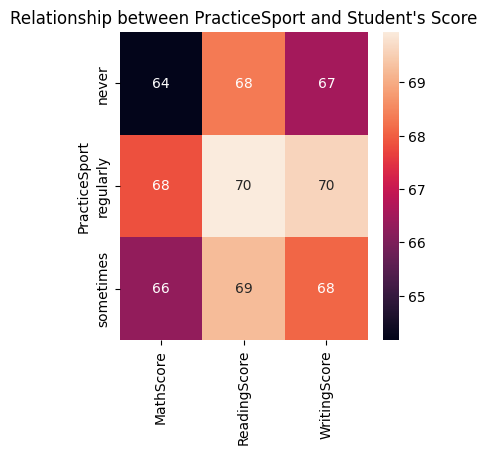

In [254]:
plt.figure(figsize=(4,4))
sns.heatmap(ps,annot=True)
plt.title("Relationship between PracticeSport and Student's Score")
plt.show()

##### Finding:It is found that student who practiced sport regularly scored higher than students who practice 'sometimes' and 'never'